### A credit score is a numerical expression based on a level analysis of a person's credit files, to represent the creditworthiness of an individual.
### Generally speaking, credit score cards are based on historical data. Once encountering large economic fluctuations.Therefore credit card companies require huge amount of data to predict whether credit card should or shouldn't be approved for an indiavidual. We are tasked with analyzing and training this credit card approval dataset.


# **BASIC EXPLORATION**

In [152]:
import pandas as pd #importing all the import libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [153]:
df = pd.read_csv('/content/Credit_card.csv') #loading the data

In [154]:
df1 = pd.read_csv('/content/Credit_card_label.csv')
df1

,Ind_ID,label
0,5008827,1
1,5009744,1
2,5009746,1
3,5009749,1
4,5009752,1
...,...,...
1543,5028645,0
1544,5023655,0
1545,5115992,0
1546,5118219,0


### Target variable (Credit_card_approval) is inserted in the same table as the independent variables

In [155]:
df.insert(18 ,"Credit_card_approval", df1['label'], True)

In [156]:
df

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,Credit_card_approval
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,F,N,Y,0,NaN,Commercial associate,Higher education,Married,House / apartment,-11957.0,-2182,1,0,0,0,Managers,2,0
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.0,-1209,1,0,0,0,Accountants,1,0
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,-13174.0,-2477,1,0,0,0,Managers,4,0
1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.0,-645,1,1,1,0,Drivers,2,0


In [157]:
df.nunique() #checking the unique values

Ind_ID                  1548
GENDER                     2
Car_Owner                  2
Propert_Owner              2
CHILDREN                   6
Annual_income            115
Type_Income                4
EDUCATION                  5
Marital_status             5
Housing_type               6
Birthday_count          1270
Employed_days            956
Mobile_phone               1
Work_Phone                 2
Phone                      2
EMAIL_ID                   2
Type_Occupation           18
Family_Members             7
Credit_card_approval       2
dtype: int64

In [158]:
df.isnull().sum() #checking for null values

Ind_ID                    0
GENDER                    7
Car_Owner                 0
Propert_Owner             0
CHILDREN                  0
Annual_income            23
Type_Income               0
EDUCATION                 0
Marital_status            0
Housing_type              0
Birthday_count           22
Employed_days             0
Mobile_phone              0
Work_Phone                0
Phone                     0
EMAIL_ID                  0
Type_Occupation         488
Family_Members            0
Credit_card_approval      0
dtype: int64


# **OUTLIERS**



### Now we handle outliers in the numerical column. Cutting off the extreme values gives us a less skewed data.

In [159]:
data = df['Annual_income']
mean = np.mean(data) #using numpy mean
std = np.std(data) #using numpy std



### In the above code, we find the mean and standard deviation of annual income. In the code cell right blow this, we find out the outliers.

In [160]:
outlier_upper = [i for i in data if i > mean+1.5*std]
outlier_lower = [i for i in data if i < mean-1.5*std]


In [161]:
data1 = sorted(data)

In [162]:
outliers = [i for i in outlier_upper if i in data1]

In [163]:
no_outliers = [i for i in data1 if i not in outliers]


In [164]:
df['new_Annual_income'] = pd.Series(no_outliers)

### Checking if the annual income data is less skewed or not. Here mean can be seen in the red line and the medisn in the yellow line.

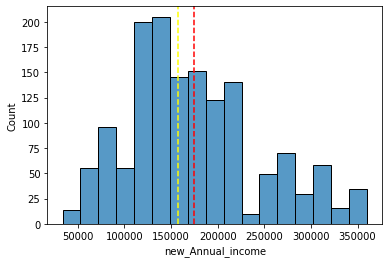

In [165]:
sns.histplot(df['new_Annual_income'])
plt.axvline(x=df['new_Annual_income'].mean(),
            color='red', linestyle= '--')
plt.axvline(x=df['new_Annual_income'].median(),
            color='yellow', linestyle = '--')


### No outliers can be seen in the below code.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


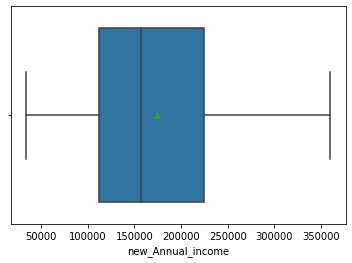

In [166]:
sns.boxplot(df['new_Annual_income'],showmeans=True)


# **MISSING VALUES**

### The null values in the normalized annual income are replaced with the median value.

In [167]:
df['new_Annual_income'].fillna(int( df['new_Annual_income'].median()),inplace = True)

### We check for null values once again.

In [168]:
df.isnull().sum()

Ind_ID                    0
GENDER                    7
Car_Owner                 0
Propert_Owner             0
CHILDREN                  0
Annual_income            23
Type_Income               0
EDUCATION                 0
Marital_status            0
Housing_type              0
Birthday_count           22
Employed_days             0
Mobile_phone              0
Work_Phone                0
Phone                     0
EMAIL_ID                  0
Type_Occupation         488
Family_Members            0
Credit_card_approval      0
new_Annual_income         0
dtype: int64

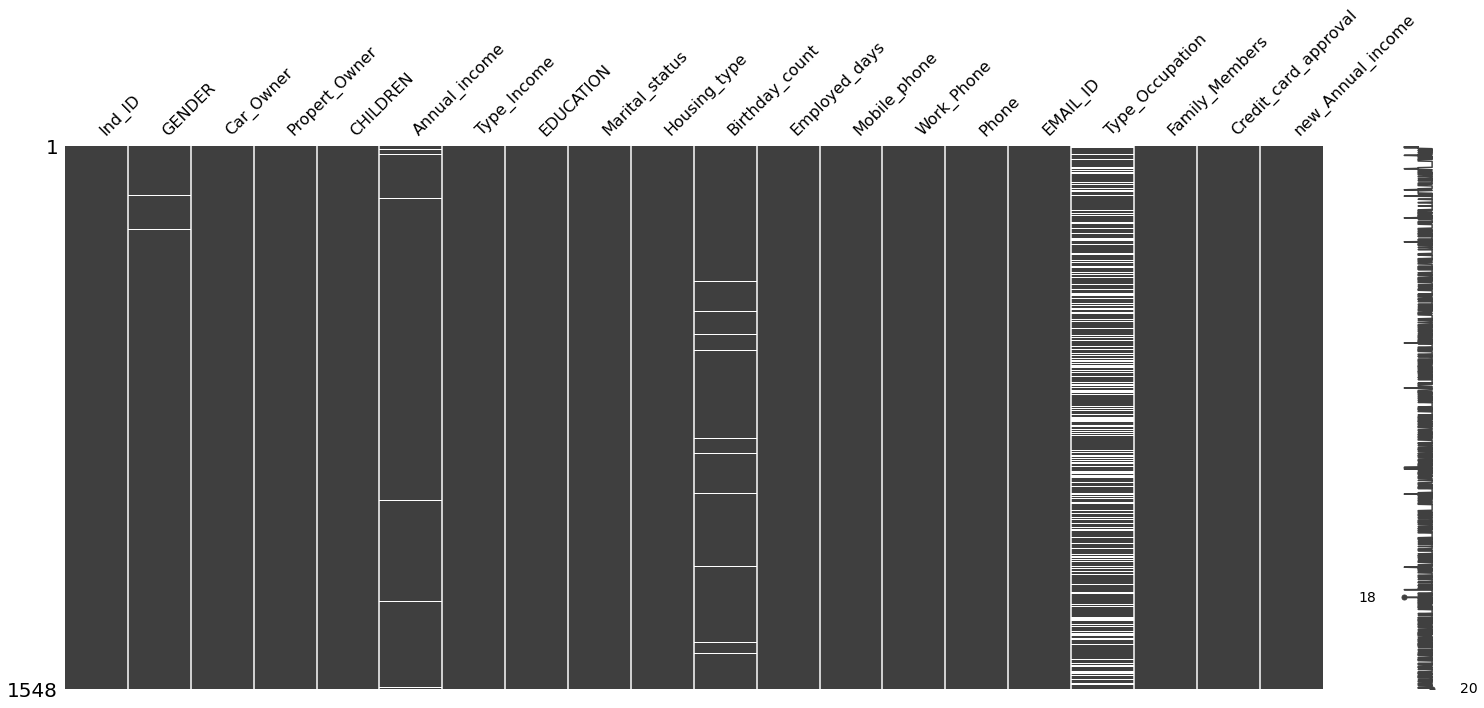

In [169]:
import missingno as msno
msno.matrix(df)

### As almost 31% of data is missing in 'Type_occupation' column I have decided to drop it. And annual income is skewed so it is also dropped.

In [170]:
df = df.drop(['Type_Occupation','Annual_income'],axis = 1)

### Finally we drop all the null values in the entire dataset.

In [171]:
df.dropna(inplace= True)





# **DATA PRE-PROCESSING**

### Since we number of days after birth of an individual, we can easily calculate a person's age.

In [172]:
df['Age'] = (df['Birthday_count']*-1)/365

### Since categorical data cannot be used in a machine learning model. One Hot Encoding is performed.

In [173]:
df = pd.get_dummies(df[['Ind_ID', 'GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN',
       'Type_Income', 'EDUCATION', 'Marital_status', 'Housing_type',
       'Birthday_count', 'Employed_days', 'Mobile_phone', 'Work_Phone',
       'Phone', 'EMAIL_ID', 'Family_Members', 'Credit_card_approval',
       'new_Annual_income','Age']])

In [174]:
df.tail()

,Ind_ID,CHILDREN,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members,Credit_card_approval,...,Marital_status_Married,Marital_status_Separated,Marital_status_Single / not married,Marital_status_Widow,Housing_type_Co-op apartment,Housing_type_House / apartment,Housing_type_Municipal apartment,Housing_type_Office apartment,Housing_type_Rented apartment,Housing_type_With parents
1543,5028645,0,-11957.0,-2182,1,0,0,0,2,0,...,1,0,0,0,0,1,0,0,0,0
1544,5023655,0,-10229.0,-1209,1,0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0
1545,5115992,2,-13174.0,-2477,1,0,0,0,4,0,...,1,0,0,0,0,1,0,0,0,0
1546,5118219,0,-15292.0,-645,1,1,1,0,2,0,...,0,0,0,0,0,1,0,0,0,0
1547,5053790,0,-16601.0,-2859,1,0,0,0,2,0,...,1,0,0,0,0,1,0,0,0,0


# **VISUALIZATION**

### Here we can see the approval rate of credit card between men and women.

Credit_card_approval    0   1
GENDER                       
F                     867  94
M                     484  74


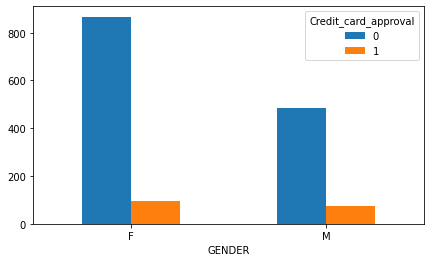

In [ ]:
CrosstabResult=pd.crosstab(index=df['GENDER'],columns=df['Credit_card_approval'])
print(CrosstabResult)
CrosstabResult.plot.bar(figsize=(7,4), rot=0)
plt.title()

### From the below graph we conclude that families with less children are more likely to get a credit card approval.

Credit_card_approval  0.0  1.0
CHILDREN                      
0                     949  120
1                     266   35
2                     119   12
3                      16    0
4                       0    1
14                      1    0


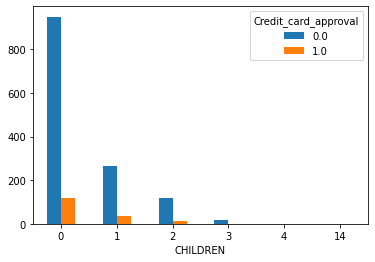

In [ ]:
CrosstabResult=pd.crosstab(index=df['CHILDREN'],columns=df['Credit_card_approval'])
print(CrosstabResult)
CrosstabResult.plot.bar(rot = 0)#0 is approved 1 is rejected

### This graph shows us that people with more income are more likely to get their credit card approved.

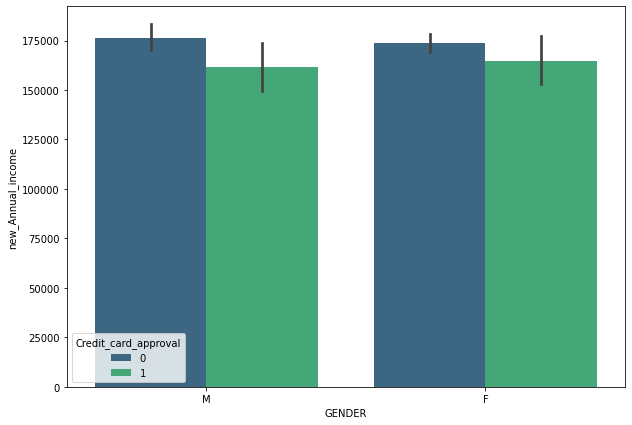

In [ ]:
plt.figure(figsize=(10,7))
sns.barplot(x='GENDER', y='new_Annual_income', data=df, hue='Credit_card_approval', dodge=True, palette='viridis')


### As you can see the disapproval rate of more educated individual is less than that of less educated individual.

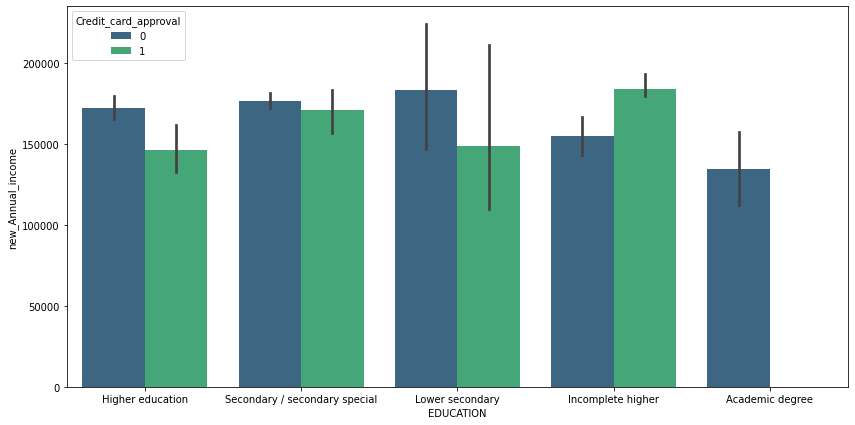

In [ ]:
plt.figure(figsize=(14,7))
sns.barplot(x='EDUCATION', y='new_Annual_income', data=df, hue='Credit_card_approval', dodge=True, palette='viridis')

### This graph shows credit card approval rate according to age.

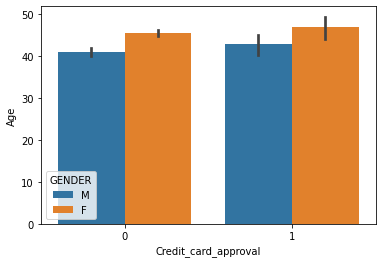

In [59]:
sns.barplot(x= 'Credit_card_approval',y='Age',hue = 'GENDER', data = df)

# **SPLITTING THE TEST AND TRAIN DATA**

### Here we can split the data into test and train. Also data gets divided into target variable and independent variable.

In [119]:
df.columns

Index(['Ind_ID', 'CHILDREN', 'Birthday_count', 'Employed_days', 'Mobile_phone',
       'Work_Phone', 'Phone', 'EMAIL_ID', 'Family_Members',
       'Credit_card_approval', 'new_Annual_income', 'GENDER_F', 'GENDER_M',
       'Car_Owner_N', 'Car_Owner_Y', 'Propert_Owner_N', 'Propert_Owner_Y',
       'Type_Income_Commercial associate', 'Type_Income_Pensioner',
       'Type_Income_State servant', 'Type_Income_Working',
       'EDUCATION_Academic degree', 'EDUCATION_Higher education',
       'EDUCATION_Incomplete higher', 'EDUCATION_Lower secondary',
       'EDUCATION_Secondary / secondary special',
       'Marital_status_Civil marriage', 'Marital_status_Married',
       'Marital_status_Separated', 'Marital_status_Single / not married',
       'Marital_status_Widow', 'Housing_type_Co-op apartment',
       'Housing_type_House / apartment', 'Housing_type_Municipal apartment',
       'Housing_type_Office apartment', 'Housing_type_Rented apartment',
       'Housing_type_With parents'],
      dty

In [178]:
X= df[['CHILDREN', 'Employed_days', 'Mobile_phone',
       'Work_Phone', 'Phone', 'EMAIL_ID', 'Family_Members',
        'new_Annual_income', 'GENDER_F', 'GENDER_M',
       'Car_Owner_N', 'Car_Owner_Y', 'Propert_Owner_N', 'Propert_Owner_Y',
       'Type_Income_Commercial associate', 'Type_Income_Pensioner',
       'Type_Income_State servant', 'Type_Income_Working',
       'EDUCATION_Academic degree', 'EDUCATION_Higher education',
       'EDUCATION_Incomplete higher', 'EDUCATION_Lower secondary',
       'EDUCATION_Secondary / secondary special',
       'Marital_status_Civil marriage', 'Marital_status_Married',
       'Marital_status_Separated', 'Marital_status_Single / not married',
       'Marital_status_Widow', 'Housing_type_Co-op apartment',
       'Housing_type_House / apartment', 'Housing_type_Municipal apartment',
       'Housing_type_Office apartment', 'Housing_type_Rented apartment',
       'Housing_type_With parents']]
Y = df['Credit_card_approval']

### About 30% of data is used in testing, the rest 70% is used to train the model.

In [179]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(X, Y,
                                               test_size=0.30,
                                               random_state=2)

In [180]:
# Import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# Instantiate MinMaxScaler and use it to rescale X_train and X_test
scaler = MinMaxScaler(feature_range=(0,1))
rescaledX_train = scaler.fit_transform(xTrain)
rescaledX_test = scaler.fit_transform(xTest)

## **MACHINE LEARNING MODELS**

### Finally machine learning models are being deployed. The first one is Logistic Regression.

In [208]:
from sklearn.metrics import accuracy_score 
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from pandas import DataFrame
from xgboost import XGBClassifier

In [181]:
from sklearn.linear_model import LogisticRegression 
# Instantiate a LogisticRegression classifier with default parameter values
logreg = LogisticRegression()
logreg.fit(rescaledX_train, yTrain)

LogisticRegression()

In [186]:
from sklearn import metrics
y_pred_test_logreg = logreg.predict(rescaledX_test)
y_pred_train_logreg = logreg.predict(rescaledX_train)


### Evaluating the accuracy of logistic regression with the help of confusion matrix.

In [187]:
print("Test: Accuracy = ", logreg.score(rescaledX_test,yTest))
print("Train: Accuracy = ", logreg.score(rescaledX_train,yTrain))

confusion_matrix = metrics.confusion_matrix(yTest,y_pred_test_logreg)
print(confusion_matrix)

Test: Accuracy =  0.8969298245614035
Train: Accuracy =  0.8852304797742239
[[409   1]
 [ 46   0]]


### The above code shows us that the accuracy from logistic regression model is 0.8969298245614035.

### The next model we use is called K-Nearest Neighbour. In the below code we test, train and select the right number of neighbors.

Text(0, 0.5, 'Error Rate')

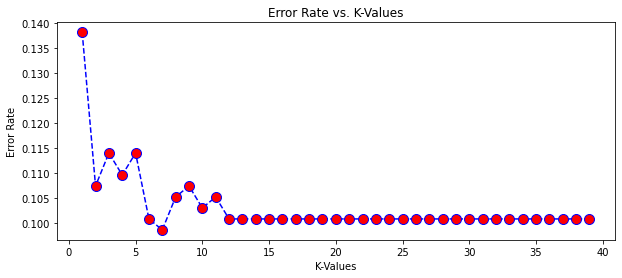

In [188]:
# import numpy
import numpy as np
error_rate = []
# searching k value upto  40
for i in range(1,40):
    # knn algorithm 
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(rescaledX_train, yTrain)
    # testing the model
    y_pred_test_knn = knn.predict(rescaledX_test)
    #training the model
    y_pred_train_knn = knn.predict(rescaledX_train)

    error_rate.append(np.mean(y_pred_test_knn != yTest))
# Configure and plot error rate over k values
plt.figure(figsize=(10,4))
plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K-Values')
plt.xlabel('K-Values')
plt.ylabel('Error Rate')

### From the above graph we conclude that k values from 13 to 39 are valid neighbors. The below code tells us that accuracy score of knn model is 0.8991228070175439.

In [191]:
test_acc_knn = accuracy_score(yTest, y_pred_test_knn)
train_acc_knn = accuracy_score(yTrain,y_pred_train_knn)
print('Train score:',train_acc_knn,'Test score:',test_acc_knn)
print(i,'Train score:',train_acc_knn,'Test score:',test_acc_knn)

Train score: 0.8852304797742239 Test score: 0.8991228070175439
39 Train score: 0.8852304797742239 Test score: 0.8991228070175439


### Next we deploy decision tree model.

In [206]:
test_acc=[]
list_score=[]


for i in range(1, 10):
    dtc = DecisionTreeClassifier(max_depth = i ,random_state = 0)
    dtc.fit(xTrain, yTrain)
    train_pred = dtc.predict(xTrain)
    test_pred = dtc.predict(xTest)
    test_acc = accuracy_score(yTest, test_pred)
    train_acc = accuracy_score(yTrain, train_pred)
    print(i,'Train score:',train_acc,'Test score:',test_acc)
    list_score.append([i,accuracy_score(train_pred, yTrain),accuracy_score(test_pred, yTest)]) 
    
  

1 Train score: 0.8852304797742239 Test score: 0.8991228070175439
2 Train score: 0.8871119473189087 Test score: 0.9013157894736842
3 Train score: 0.8918156161806209 Test score: 0.9013157894736842
4 Train score: 0.8974600188146754 Test score: 0.8969298245614035
5 Train score: 0.90310442144873 Test score: 0.8991228070175439
6 Train score: 0.9134524929444967 Test score: 0.8793859649122807
7 Train score: 0.916274694261524 Test score: 0.8903508771929824
8 Train score: 0.9219190968955786 Test score: 0.8793859649122807
9 Train score: 0.9313264346190028 Test score: 0.8925438596491229


### In the plot of Accuracy vs Depth for train and test data, we see for max_depth = 4 both train and test accuracy are the same. We choose this value for our model as it avoids a model that is either overfitted or underfitted.

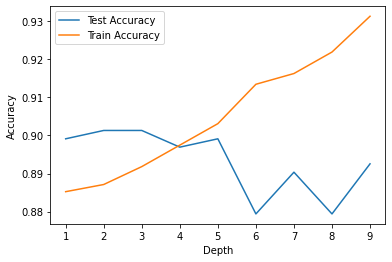

In [207]:
df2 = DataFrame (list_score,columns=['Depth','Train Accuracy','Test Accuracy'])
plt.plot(df2['Depth'],df2['Test Accuracy'],label='Test Accuracy')
plt.plot(df2['Depth'],df2['Train Accuracy'],label='Train Accuracy')
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.legend()    

### Our fourth model is XGBOOST.

In [210]:
model = XGBClassifier()
model.fit(xTrain, yTrain)
y_pred_train_xg= model.predict(xTrain)
y_pred_test_xg = model.predict(xTest)
test_acc = accuracy_score(yTest, y_pred_test_xg)
train_acc = accuracy_score(yTrain, y_pred_train_xg)
print('Train score:',train_acc,'Test score:',test_acc)

Train score: 0.896519285042333 Test score: 0.9035087719298246


### From evaluating all four above models, we can conclude that XGBoost model is the most accurate. Since it has a test score accuracy of 0.9035087719298246 whereas Logistic Regression, Decision Tree, KNN models have accuracy scores of 0.8969298245614035, 0.8969298245614035,0.8991228070175439 respectively.